# Lasso Regression

Lasso regression (or least-absolute shrinkage selective operator), adds a $\ell_1$ regularization to induce sparcity (i.e. many of $\beta_j$'s are zero.)

$$
f(\beta) = |Y - X\beta|^2 + \lambda|\beta|_{\ell_1}.
$$

Earlier in Ridge regression, we optimize for all $\beta_j$'s with a constraint that $\beta$ shall be small or smooth.
In Lasso, we believe only a small number of features are important. The regularization actually acts as _variable selection_.

This model is especially useful for $p >> n$ cases. Consider in Genetics, for example, we may have $n=100$ observations where each observation consists of around $p=20,000$ gene features and a response. Obviously, it is not likely that all genes contribute to the response. Hence, in such scenarios, we want to fit a regression model with only a selected subset of variables.

Note that in Lasso regression, the dimensions are give, we only choose a sparse subset. It differs from PCA in two ways: (1) PCA find the projection dimension by variance; (2) PCA does not need the response $y$ (i.e. unsupervised).

## Soft threasholding

Let's consider a simple Lasso example in one dimension case
$$f(\beta) = \dfrac{1}{2} (y-\beta)^2 + \lambda |\beta|. \quad (\lambda>0)$$

This function is convex. At the point $\beta = 0$, we derive the left and right derivative, the change of slope is $2\lambda$:
$$
\begin{align*}
f^{'}_{-}(\beta) &=  -(y-\beta) -\lambda, \\
f^{'}_{+}(\beta) &=  -(y-\beta) + \lambda.
\end{align*}
$$

When $f^{'}_{-}(\beta) < 0$ and $f^{'}_{-}(\beta)>0$, $\beta = 0$ is the solution. I.e.
\begin{align*}
-(y-\beta) -\lambda &< 0,  \\
-(y-\beta) + \lambda &> 0.
\end{align*}

Assume $y>0$, we have
\begin{align*}
y < \lambda &\implies \hat{\beta} = 0,  \\
y > \lambda &\implies \hat{\beta} = y - \lambda.
\end{align*}
On the other hand, when $y<0$,
\begin{align*}
y > -\lambda &\implies \hat{\beta} = 0,  \\
y < -\lambda &\implies \hat{\beta} = y + \lambda.
\end{align*}

In a compact way, we can write $$\hat{\beta} = \textrm{sign}(y)\cdot \max(0, |y|-\lambda).$$

This is called __soft thresholding__, where $\lambda$ is the threashold.
When the response is not big enough, it just got shrinked to zero.

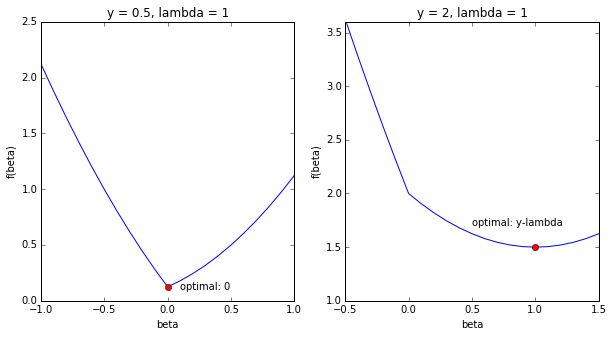

In [1]:
# Plot f(\beta) and \hat{\beta} under 0 < y < lambda and y > lambda respectively.

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
#import seaborn as sns

import numpy as np

def f(y, beta, lam=1):
    return 0.5 * (y-beta)**2 + lam*np.abs(beta)

#  0 < y < lambda 
y = 0.5
beta = np.linspace(-1, 1.0, 21)
f1 = f(y, beta)

#  y > lambda
y2 = 2
beta2 = np.linspace(-0.5, 1.5, 21)
f2 = f(y2, beta2)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.ylim((0, 2.5))
plt.xlabel('beta')
plt.ylabel('f(beta)')
plt.plot(beta, f1)
plt.title('y = 0.5, lambda = 1')
plt.annotate('optimal: 0', xy=(0, 0.125), xytext=(0.1, 0.1))
plt.plot([0], [0.125], 'o', color='red')

plt.subplot(1, 2, 2)
plt.ylim((1, 3.6))
plt.xlabel('beta')
plt.ylabel('f(beta)')
plt.plot(beta2, f2)
plt.title('y = 2, lambda = 1')
plt.annotate('optimal: y-lambda', xy=(1, 1.5), xytext=(0.5, 1.7))
plt.plot([1], [1.5], 'o', color='red')

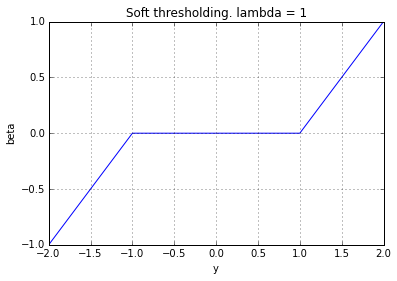

In [2]:
# Plot beta hat.

def beta_hat(y, lam=1):
    return np.sign(y) * np.maximum(0, np.abs(y)-lam)

y = np.linspace(-2, 2, 41)
b = beta_hat(y)

plt.figure()
plt.grid(True)
plt.title('Soft thresholding. lambda = 1')
plt.ylabel('beta')
plt.xlabel('y')
plt.plot(y, b)

## Subgradient of convex functions

Consider function $y = |\beta|$, at $\beta=0$, the sub gradient is the slope of any line below the function.
$$
\dfrac{\partial}{\partial \beta}|\beta| = s \in [-1, 1].
$$

To find $\hat{\beta}$, let's take derivative of $f(\beta) = \dfrac{1}{2} (y-\beta)^2 + \lambda |\beta|$ and set it to zero.
$$
\begin{align*}
f'(\beta) &= -(y-\beta) + \lambda s = 0\\
\beta &= y -\lambda s.
\end{align*}
$$

From soft-threasholding above, we can derive:

* if $\hat{\beta} > 0 , s=1$;
* if $\hat{\beta} < 0 , s=-1$; 
* if $\hat{\beta} = 0 , s\in [-1, 1].$

## Geometric interpretation

This section, we investigate why the L1 regularization can give us sparsity.

### Lasso
Let's consider the objective function (assuming $y>0$)
$$
\begin{align*}
f(\beta) &= \dfrac{1}{2} (y-\beta)^2 + \lambda |\beta| \\
&= \dfrac{1}{2} (y^2 - 2 y\beta + \beta^2) + \lambda |\beta| .
\end{align*}
$$

To have sparsity, i.e. $\hat{\beta} =0$, we need $f(\beta) \geq f(0) = y^2, \forall \beta$.

Consider the case $\beta > 0$, as long as the the threashold $\lambda > y$, we can get the sparse solution, since
$$
f(\beta) - f(0) = \dfrac{1}{2}\beta^2 - y\beta + \lambda\beta  \geq 0.
$$

Essentially we are comparing $y\beta$ and $\lambda\beta$.

### $L_2$ Norm

In the case of $L_2$ regularization,
$$
\begin{align*}
f(\beta) &= \dfrac{1}{2} (y^2 - 2 y\beta + \beta^2) + \lambda \beta^2, \\
f(\beta) - f(0) &= \dfrac{1}{2}\beta^2 - y\beta + \lambda\beta^2.
\end{align*}
$$
Essentially we are comparing $y\beta$ and $\lambda\beta^2$.
Having $\lambda > y$ does not guarantee $\beta = 0$ being the solution, therefore does not give sparse solutions.

### $L_{1/2}$ Norm

In the case of $L_{1/2}$ regularization,
we are comparing $y\beta$ and $\lambda|\beta|^{1/2}$.

$\beta = 0$ is only the local minimal.
It only enforces sparsity locally as $\lambda \beta^{1/2} < y\beta$ when $\beta$ is large.



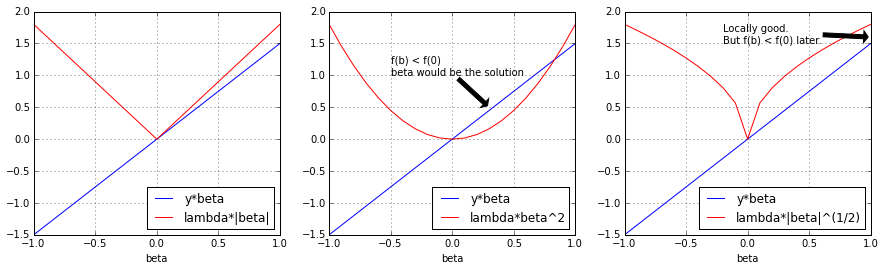

In [3]:
lam = 1.8
y = 1.5
beta = np.linspace(-1, 1, 21)

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.plot(beta, y*beta, label='y*beta')
plt.plot(beta, lam*np.abs(beta), label='lambda*|beta|', color='red')
plt.xlabel('beta')
plt.legend(loc='best')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(beta, y*beta, label='y*beta')
plt.plot(beta, lam*(beta**2), label='lambda*beta^2', color='red')
plt.annotate('f(b) < f(0)\nbeta would be the solution', xy=(0.3, 0.5), xytext=(-0.5, 1),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(loc='best')
plt.xlabel('beta')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(beta, y*beta, label='y*beta')
plt.plot(beta, lam*np.power(np.abs(beta),0.5), label='lambda*|beta|^(1/2)', color='red')
plt.annotate('Locally good.\nBut f(b) < f(0) later.', xy=(1.0, 1.6), xytext=(-0.2, 1.5),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.legend(loc='best')
plt.xlabel('beta')
plt.grid(True)

## Another geometric interpretation

Consider the optimization problem
$$
\begin{align*}
\min &\quad \dfrac{1}{2} |Y-X\beta|^2,\\
\textrm{st} &\quad |\beta|_{\ell_1} \leq t,
\end{align*}
$$
where $t = |\hat{\beta}|_{\ell_1}$, $\hat{\beta}$ is the solution minimized $f(\beta)$ above.

The solution to this problem is equivalent to the previous one. To see this, suppose we have a $\tilde{\beta}$ satisfing the constraint 
$|\tilde{\beta}| \leq t$, it is impossible to be a better solution $\dfrac{1}{2} |Y-X\tilde{\beta}|^2 \leq \dfrac{1}{2} |Y-X\hat{\beta}|^2$.

We plot the contraint region for $L_1$, $L_2$, and $L_{1/2}$ norm respectively. The optimization problem is to find a minimal quadratic function w.r.t the contraints.

In general, for $L_p$ norm, 

* if $p<1$ the contour is not convex, solution is sparse (even sparser).
* if $p=1$ the contour is convex, yield sparse solution.
* if $p>1$ the contour is convex, not sparse

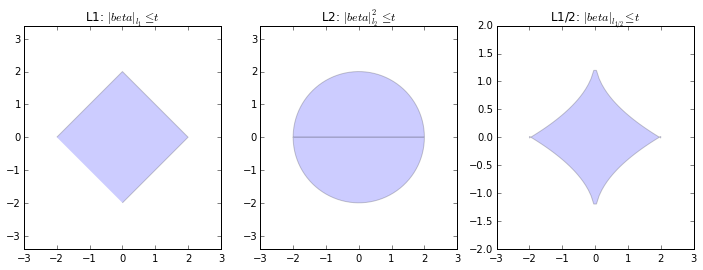

In [4]:
from matplotlib.path import Path
from matplotlib.patches import PathPatch

plt.figure(figsize=(12,4))

ax = plt.subplot(1,3,1)
path = Path([(-2, 0), (0, 2), (2, 0), (0, -2)])
patch = PathPatch(path, label='feasible region', alpha=0.2)
ax.add_patch(patch)
plt.axis('equal')
plt.xlim([-3, 3])
plt.title('L1: $|beta|_{l_1}\leq t$')

plt.subplot(1,3,2)
an = np.linspace(0, 2*np.pi, 100)
plt.fill_between(2*np.cos(an), 0, 2*np.sin(an), alpha=0.2)
plt.axis('equal')
plt.xlim([-3, 3])
plt.title('L2: $|beta|_{l_2}^2\leq t$')

plt.subplot(1,3,3)
plt.fill_between(np.linspace(-2, 2),
                 np.power(np.abs(np.linspace(-2, 2)), 0.5)-1.4,
                 1.4-np.power(np.abs(np.linspace(-2, 2)), 0.5), alpha=0.2)
plt.xlim([-3, 3])
plt.ylim([-2, 2])
plt.title('L1/2: $|beta|_{l_{1/2}} \leq t$')